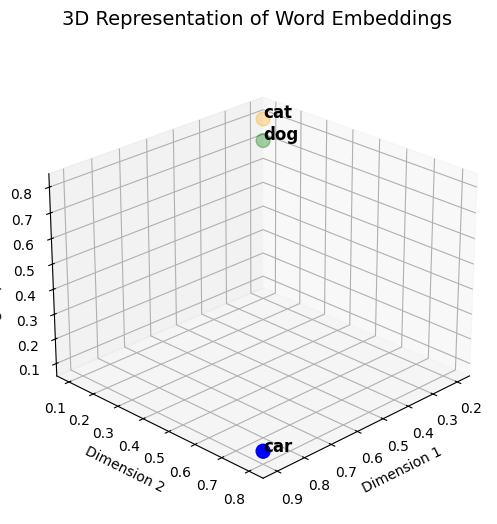

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example 3D embedding coordinates (simulated, not real embeddings)


embeddings = {
    "cat": [0.2, 0.1, 0.8],
    "dog": [0.25, 0.15, 0.75],
    "car": [0.9, 0.8, 0.1],
}

# Extract x, y, z coordinates
labels = list(embeddings.keys())
xs = [embeddings[word][0] for word in labels]
ys = [embeddings[word][1] for word in labels]
zs = [embeddings[word][2] for word in labels]

# Create 3D scatter plot
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot each word as a point
ax.scatter(xs, ys, zs, color=['orange', 'green', 'blue'], s=100)

# Add labels for each point
for i, word in enumerate(labels):
    ax.text(xs[i]+0.02, ys[i]+0.02, zs[i]+0.02, word, fontsize=12, weight='bold')

# Label the axes
ax.set_xlabel('Dimension 1', fontsize=10)
ax.set_ylabel('Dimension 2', fontsize=10)
ax.set_zlabel('Dimension 3', fontsize=10)

# Title and layout
ax.set_title("3D Representation of Word Embeddings", fontsize=14, pad=20)
ax.view_init(elev=25, azim=45)

plt.show()


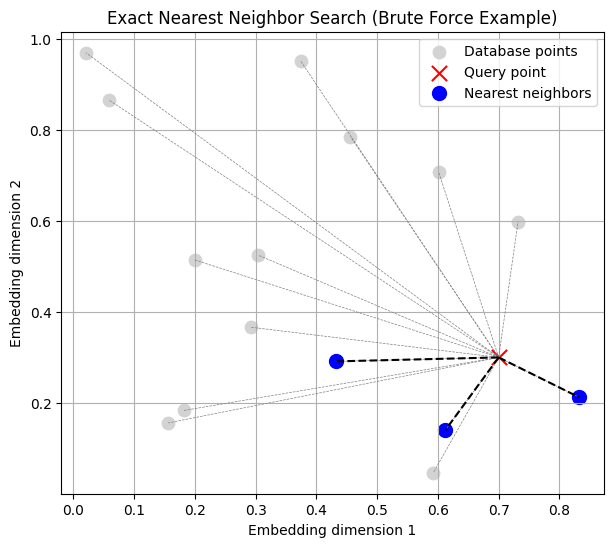

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Create random 2D "embeddings"
np.random.seed(42)
points = np.random.rand(15, 2)  # 15 random points
query = np.array([[0.7, 0.3]])

# Compute Euclidean distances manually (exact)
distances = np.sqrt(np.sum((points - query) ** 2, axis=1))
nearest_idx = np.argsort(distances)[:3]  # top 3 nearest neighbors

# Plot setup
plt.figure(figsize=(7, 6))
plt.scatter(points[:, 0], points[:, 1], c='lightgray', s=80, label='Database points')
plt.scatter(query[:, 0], query[:, 1], c='red', s=120, marker='x', label='Query point')

# Highlight exact nearest neighbors
plt.scatter(points[nearest_idx, 0], points[nearest_idx, 1], c='blue', s=100, label='Nearest neighbors')

# Draw dashed lines to all points (since brute-force compares to all)
for i in range(len(points)):
    plt.plot([query[0, 0], points[i, 0]], [query[0, 1], points[i, 1]], 'gray', linestyle='--', linewidth=0.5)

# Emphasize the nearest 3 distances in thicker black lines
for i in nearest_idx:
    plt.plot([query[0, 0], points[i, 0]], [query[0, 1], points[i, 1]], 'k--', linewidth=1.5)

plt.title("Exact Nearest Neighbor Search (Brute Force Example)")
plt.xlabel("Embedding dimension 1")
plt.ylabel("Embedding dimension 2")
plt.legend()
plt.grid(True)
plt.show()


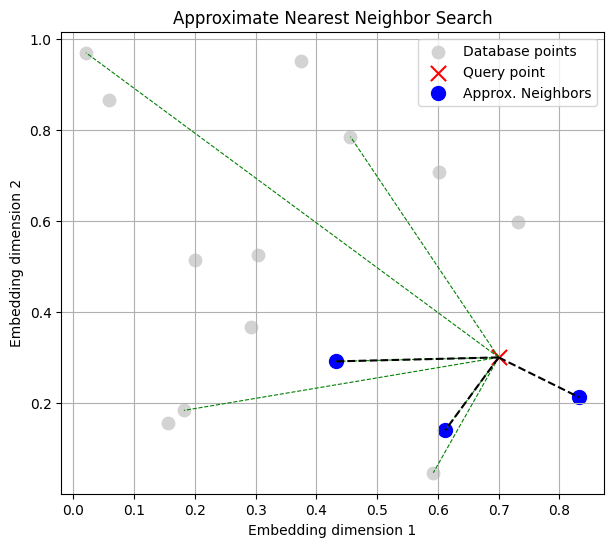

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KDTree

# Create random 2D "embeddings"
np.random.seed(42)
points = np.random.rand(15, 2)
query = np.array([[0.7, 0.3]])

# Build KD-Tree (approximate structure)
tree = KDTree(points, leaf_size=2)

# Query for nearest neighbors (k=3)
dist, ind = tree.query(query, k=3)

# Approximate result
nearest_idx = ind[0]

# Plot all points
plt.figure(figsize=(7, 6))
plt.scatter(points[:, 0], points[:, 1], c='lightgray', s=80, label='Database points')
plt.scatter(query[:, 0], query[:, 1], c='red', s=120, marker='x', label='Query point')

# Highlight approximate nearest neighbors
plt.scatter(points[nearest_idx, 0], points[nearest_idx, 1], c='blue', s=100, label='Approx. Neighbors')

# Draw dashed lines to *some* points (simulating partial comparisons)
visited_points = np.random.choice(len(points), 6, replace=False)
for i in visited_points:
    plt.plot([query[0, 0], points[i, 0]], [query[0, 1], points[i, 1]], 'green', linestyle='--', linewidth=0.8)

# Draw thicker lines to approximate neighbors
for i in nearest_idx:
    plt.plot([query[0, 0], points[i, 0]], [query[0, 1], points[i, 1]], 'k--', linewidth=1.5)

plt.title("Approximate Nearest Neighbor Search")
plt.xlabel("Embedding dimension 1")
plt.ylabel("Embedding dimension 2")
plt.legend()
plt.grid(True)
plt.show()


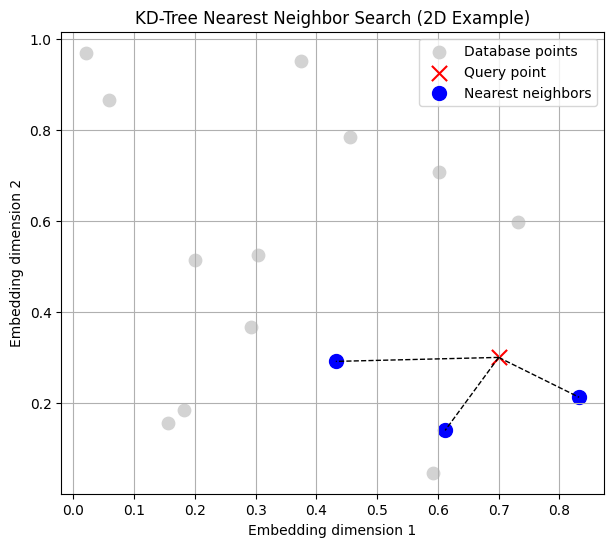

In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
import numpy as np

# Create random 2D "embeddings"
np.random.seed(42)
points = np.random.rand(15, 2)  # 15 random points in 2D space

# Build KD-Tree
tree = KDTree(points, leaf_size=2)

# Define a query point
query = np.array([[0.7, 0.3]])

# Find 3 nearest neighbors
dist, ind = tree.query(query, k=3)

# Plot setup
plt.figure(figsize=(7, 6))
plt.scatter(points[:, 0], points[:, 1], c='lightgray', s=80, label='Database points')
plt.scatter(query[:, 0], query[:, 1], c='red', s=120, marker='x', label='Query point')

# Highlight the nearest neighbors
plt.scatter(points[ind[0], 0], points[ind[0], 1], c='blue', s=100, label='Nearest neighbors')

# Draw lines from query to its neighbors
for i in ind[0]:
    plt.plot([query[0, 0], points[i, 0]], [query[0, 1], points[i, 1]], 'k--', linewidth=1)

# Labels
plt.title("KD-Tree Nearest Neighbor Search (2D Example)")
plt.xlabel("Embedding dimension 1")
plt.ylabel("Embedding dimension 2")
plt.legend()
plt.grid(True)
plt.show()
